## Meta data

* This dataset (ml-latest-small) describes 5-star rating and free-text tagging activity from [MovieLens](http://movielens.org), a movie recommendation service. 
* It contains 100836 ratings and 3683 tag applications across 9742 movies. 
* These data were created by 610 users between March 29, 1996 and September 24, 2018. This dataset was generated on September 26, 2018.
* All selected users had rated at least 20 movies. No demographic information is included. Each user is represented by an id, and no other information is provided.
* User Ids-MovieLens users were selected at random for inclusion. Their ids have been anonymized. User ids are consistent between  `ratings.csv` and `tags.csv` (i.e., the same id refers to the same user across the two files).
* Movie Ids- Only movies with at least one rating or tag are included in the dataset. These movie ids are consistent with those used on the MovieLens web site (e.g., id `1` corresponds to the URL <https://movielens.org/movies/1>). Movie ids are consistent between `ratings.csv`, `tags.csv`, `movies.csv`, and `links.csv` (i.e., the same id refers to the same movie across these four data files).



### Ratings Data File Structure (ratings.csv)-
All ratings are contained in the file `ratings.csv`. Each line of this file after the header row represents one rating of one movie by one user, and has the following format:
userId,movieId,rating,timestamp

The lines within this file are ordered first by userId, then, within user, by movieId.

Ratings are made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars).

Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.

### Movies Data File Structure (movies.csv)
Movie information is contained in the file `movies.csv`. Each line of this file after the header row represents one movie, and has the following format:

    movieId,title,genres

Movie titles are entered manually or imported from <https://www.themoviedb.org/>, and include the year of release in parentheses. Errors and inconsistencies may exist in these titles.

Genres are a pipe-separated list, and are selected from the following:

* Action
* Adventure
* Animation
* Children's
* Comedy
* Crime
* Documentary
* Drama
* Fantasy
* Film-Noir
* Horror
* Musical
* Mystery
* Romance
* Sci-Fi
* Thriller
* War
* Western
* (no genres listed)

### Links Data File Structure (links.csv)-
Identifiers that can be used to link to other sources of movie data are contained in the file `links.csv`. Each line of this file after the header row represents one movie, and has the following format:

    movieId,imdbId,tmdbId

movieId is an identifier for movies used by <https://movielens.org>. E.g., the movie Toy Story has the link <https://movielens.org/movies/1>.

imdbId is an identifier for movies used by <http://www.imdb.com>. E.g., the movie Toy Story has the link <http://www.imdb.com/title/tt0114709/>.

tmdbId is an identifier for movies used by <https://www.themoviedb.org>. E.g., the movie Toy Story has the link <https://www.themoviedb.org/movie/862>.

### Tags Data File Structure (tags.csv)-
All tags are contained in the file `tags.csv`. Each line of this file after the header row represents one tag applied to one movie by one user, and has the following format:
userId,movieId,tag,timestamp

The lines within this file are ordered first by userId, then, within user, by movieId.

Tags are user-generated metadata about movies. Each tag is typically a single word or short phrase. The meaning, value, and purpose of a particular tag is determined by each user.

Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.


## Objective of the project

To make a Recommender System using the MovieLens dataset to recommended movies to users---
Model used in the recommneder system will be content based filtering based on genres and tags and evaluate using Knn classification. Will try to build a hybrid model- Content based filtering + Model Based Collabrative filtering (mostly SVD may vary) as the Content based filtering will determine the movies which we want to recommend to the user and MC 
Filter to sort the recommendations of CF using SVD predicted ratings 

## ML Techniques Being Used

* The following techniques are not final and may vary depending on the further development of the project
* **PANDAS** FOR DATA MANIPULATION
* **NUMPY** FOR MANIPULATING ARRAYS
* **SEABORN** AND MATPLOTLIB FOR PLOTTING VARIOUS GRAPHS
* **SKLEARN** FOR THE BASE ML MODEL
* **FASTAPI** FOR DEPLOYMENT


## Importing Libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset : Movielens

In [3]:
# Reading movies file
df_movies=pd.read_csv('movies.csv')
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [5]:
# Reading links file
df_links=pd.read_csv('links.csv')
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [6]:
df_links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


In [7]:
# Reading ratings file
df_ratings=pd.read_csv('ratings.csv')
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [8]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [9]:
# Reading tags file
df_tags=pd.read_csv('tags.csv')
df_tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [10]:
df_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [11]:
print("Shape of frames: \n"+ " Rating DataFrame"+ str(df_ratings.shape)+"\n Movies DataFrame"+ str(df_movies.shape)+"\n Tags DataFrame"+str(df_tags.shape)+"\n Links DataFrame"+str(df_links.shape))

Shape of frames: 
 Rating DataFrame(100836, 4)
 Movies DataFrame(9742, 3)
 Tags DataFrame(3683, 4)
 Links DataFrame(9742, 3)


## Exploratory Data Analysis (EDA) 

In [12]:
# Merging the movies and rating dataset
df_merge_rm=pd.merge(df_movies,df_ratings,on='movieId')
df_merge_rm=df_merge_rm.drop('timestamp',axis=1)
df_merge_rm.head()

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5


In [13]:
#To check for any missing values 
df_merge_rm.isnull().sum()
#As we can see there are no missing values in the table

movieId    0
title      0
genres     0
userId     0
rating     0
dtype: int64

In [14]:
# Merging the movies and tags dataset
df_merge_tm=pd.merge(df_movies,df_tags,on='movieId')
df_merge_tm=df_merge_tm.drop('timestamp',axis=1)
df_merge_tm

,movieId,title,genres,userId,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567,fun
3,2,Jumanji (1995),Adventure|Children|Fantasy,62,fantasy
4,2,Jumanji (1995),Adventure|Children|Fantasy,62,magic board game
...,...,...,...,...,...
3678,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,62,star wars
3679,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,anime
3680,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,comedy
3681,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,gintama


In [15]:
# To check for missing data values in tags and movies merged dataset
df_merge_tm.isnull().sum()
# As we can see there are no missing values 

movieId    0
title      0
genres     0
userId     0
tag        0
dtype: int64

In [16]:
print("Shape of Ratings and movies merged dataset "+str(df_merge_rm.shape))
print("Shape of Tags and movies merged dataset "+str(df_merge_tm.shape))

Shape of Ratings and movies merged dataset (100836, 5)
Shape of Tags and movies merged dataset (3683, 5)


In [17]:
df_merge_rm.groupby('title')['rating'].mean().sort_values(ascending=False)

title
Gena the Crocodile (1969)                  5.0
True Stories (1986)                        5.0
Cosmic Scrat-tastrophe (2015)              5.0
Love and Pigeons (1985)                    5.0
Red Sorghum (Hong gao liang) (1987)        5.0
                                          ... 
Don't Look Now (1973)                      0.5
Journey 2: The Mysterious Island (2012)    0.5
Joe Dirt 2: Beautiful Loser (2015)         0.5
Jesus Christ Vampire Hunter (2001)         0.5
Fullmetal Alchemist 2018 (2017)            0.5
Name: rating, Length: 9719, dtype: float64

In [18]:
df_merge_rm.groupby('title')['rating'].count().sort_values(ascending=False)

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
                                            ... 
King Solomon's Mines (1950)                    1
King Solomon's Mines (1937)                    1
King Ralph (1991)                              1
King Kong Lives (1986)                         1
À nous la liberté (Freedom for Us) (1931)      1
Name: rating, Length: 9719, dtype: int64

In [19]:
ratings = pd.DataFrame(df_merge_rm.groupby('title')['rating'].mean().sort_values(ascending=False))
ratings

,rating
title,
Gena the Crocodile (1969),5.0
True Stories (1986),5.0
Cosmic Scrat-tastrophe (2015),5.0
Love and Pigeons (1985),5.0
Red Sorghum (Hong gao liang) (1987),5.0
...,...
Don't Look Now (1973),0.5
Journey 2: The Mysterious Island (2012),0.5
Joe Dirt 2: Beautiful Loser (2015),0.5


In [20]:
ratings['num of ratings'] = pd.DataFrame(df_merge_rm.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
Gena the Crocodile (1969),5.0,1
True Stories (1986),5.0,1
Cosmic Scrat-tastrophe (2015),5.0,1
Love and Pigeons (1985),5.0,1
Red Sorghum (Hong gao liang) (1987),5.0,1


<AxesSubplot:>

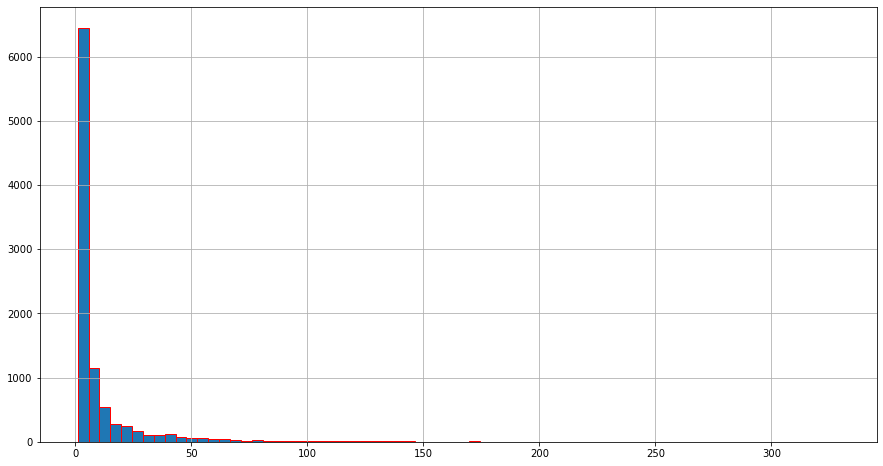

In [21]:
plt.figure(figsize=(15,8))
ratings['num of ratings'].hist(edgecolor='red',bins=70)

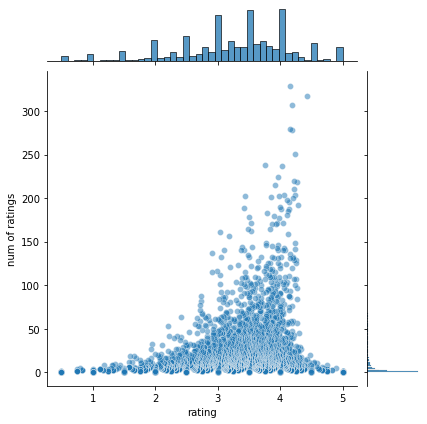

In [22]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

### Distribution of User Rating

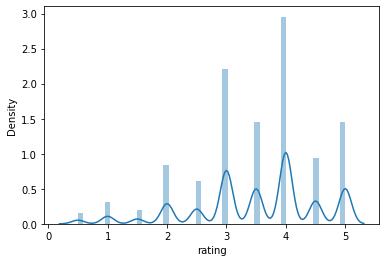

In [23]:
sns.distplot(df_merge_rm["rating"]);

## Movie Count in every Genres

<AxesSubplot:>

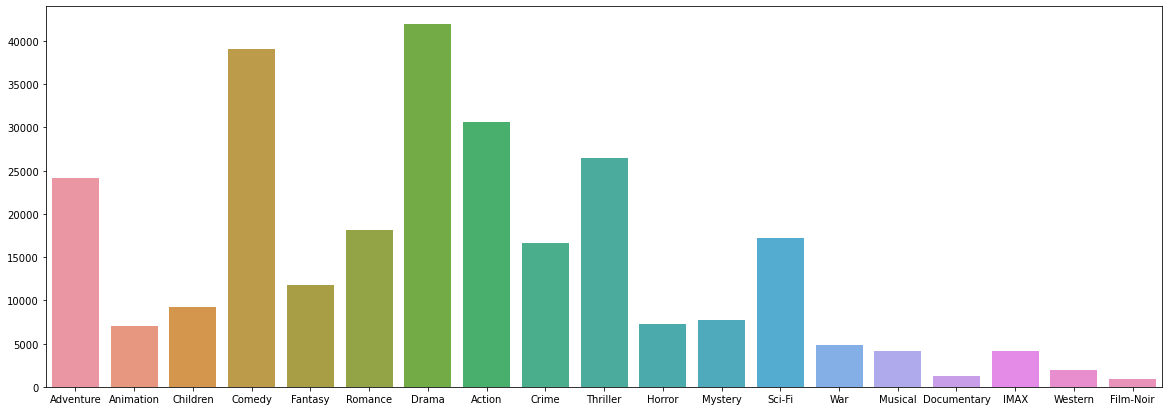

In [24]:
plt.figure(figsize=(20,7))
generlist = df_merge_rm['genres'].apply(lambda generlist_movie : str(generlist_movie).split("|"))
geners_count = {}

for generlist_movie in generlist:
    
    for i in generlist_movie:
        if(geners_count.get(i, False)):
            geners_count[i]=geners_count[i]+1
        else:
            geners_count[i] = 1       
geners_count.pop("(no genres listed)")
keys=list(geners_count.keys())
keys
values=list(geners_count.values())
sns.barplot(x=keys,y=values)

### Top 10 user who have rated most of the movies

<AxesSubplot:xlabel='userId'>

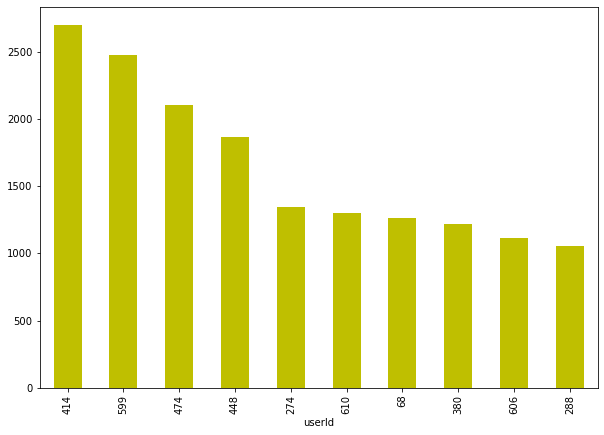

In [25]:
ratings_grouped_by_users = df_merge_rm.groupby('userId').agg([np.mean, np.size])
ratings_grouped_by_users = ratings_grouped_by_users.drop('movieId', axis = 1)
ru=ratings_grouped_by_users['rating']['size'].sort_values(ascending=False).head(10)
ru.plot.bar(figsize=(10,7),color='y')

### Top 10 Watched Movies

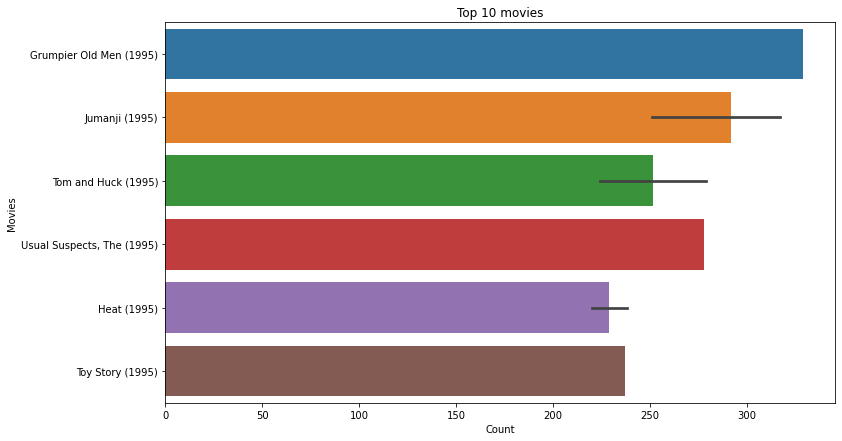

In [26]:
ratings_grouped_by_movies = df_merge_rm.groupby('movieId').size().sort_values(ascending=False)[:10]
top_ten_movie_titles=df_merge_rm.loc[ratings_grouped_by_movies.index].title
plt.figure(figsize=(12, 7))
sns.barplot(y=top_ten_movie_titles.values, x=ratings_grouped_by_movies, orient='h')
plt.title('Top 10 movies')
plt.ylabel('Movies')
plt.xlabel('Count')
plt.show()

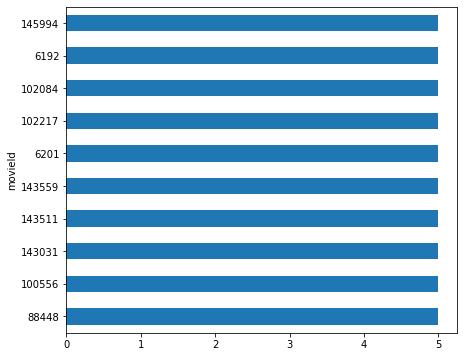

In [27]:
rating_grouped_by_movies = df_merge_rm.groupby('movieId').agg([np.mean], np.size)
rating_grouped_by_movies = rating_grouped_by_movies.drop('userId', axis=1)
rating_grouped_by_movies['rating']['mean'].sort_values(ascending=False).head(10).plot(kind='barh', figsize=(7,6));

### MoviesId with low average rating

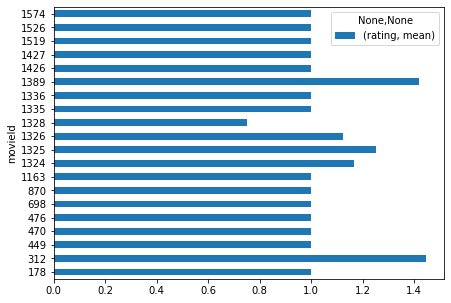

In [28]:
low_rated_movies_filter = rating_grouped_by_movies['rating']['mean']< 1.5
low_rated_movies = rating_grouped_by_movies[low_rated_movies_filter]
low_rated_movies.head(20).plot(kind='barh', figsize=(7,5));

In [29]:
low_rated_movies.head(10)

,rating
,mean
movieId,
178,1.000000
312,1.444444
449,1.000000
470,1.000000
476,1.000000
698,1.000000
870,1.000000
1163,1.000000


### Top 10 tags count

In [30]:
tm_value = (df_merge_tm['tag'].value_counts().head(10))
df = pd.DataFrame(tm_value)
y=df.values.reshape(-1)

<AxesSubplot:>

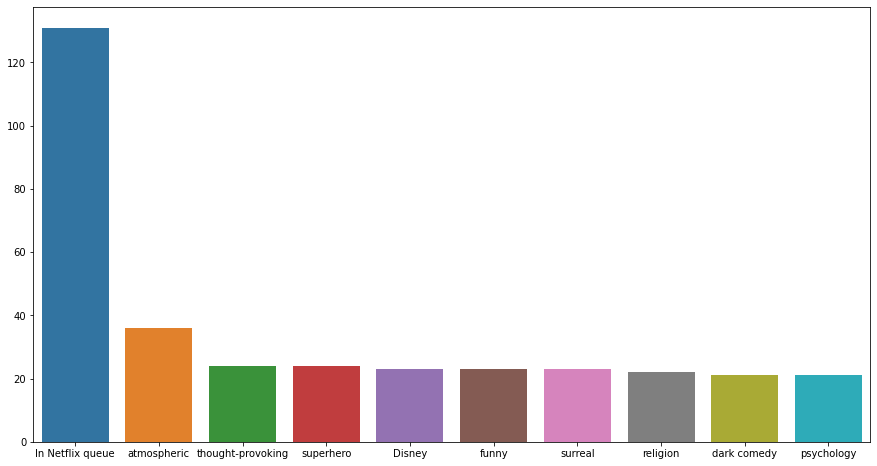

In [31]:
plt.figure(figsize=(15,8))
sns.barplot(x=df.index, y=y)

## Model Building

## Content based fitering based on Genres

Using the content based filtering on genres
- First using the Tf-Idf Vectorizer which will help capture the important genres of each movie by giving a higher weight to the less frequent genres
- Then finding similar tf-idf vector based (movies) using cosine-similarity 

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [33]:
tfidf_movies_genres = TfidfVectorizer(token_pattern = '[a-zA-Z0-9\-]+')
#Replace NaN with an empty string
df_movies['genres'] = df_movies['genres'].replace(to_replace="(no genres listed)", value="")
#Constructing the required TF-IDF matrix by fitting and transforming the data
tfidf_movies_genres_matrix = tfidf_movies_genres.fit_transform(df_movies['genres'])

print(tfidf_movies_genres.get_feature_names())
print(tfidf_movies_genres_matrix.shape)

['action', 'adventure', 'animation', 'children', 'comedy', 'crime', 'documentary', 'drama', 'fantasy', 'film-noir', 'horror', 'imax', 'musical', 'mystery', 'romance', 'sci-fi', 'thriller', 'war', 'western']
(9742, 19)


In [34]:
# Computing the cosine similarity matrix
cosine_sim_movies = cosine_similarity(tfidf_movies_genres_matrix)
print(cosine_sim_movies)
print(cosine_sim_movies.shape)

[[1.         0.81357774 0.15276924 ... 0.         0.4210373  0.26758648]
 [0.81357774 1.         0.         ... 0.         0.         0.        ]
 [0.15276924 0.         1.         ... 0.         0.         0.57091541]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.4210373  0.         0.         ... 0.         1.         0.        ]
 [0.26758648 0.         0.57091541 ... 0.         0.         1.        ]]
(9742, 9742)


In [35]:
def get_recommendations_based_on_genres(movie_title, cosine_sim_movies=cosine_sim_movies):
    """
    Calculates top 15 movies to recommend based on given movie titles genres. 
    :param movie_title: title of movie to be taken for base of recommendation
    :param cosine_sim_movies: cosine similarity between movies 
    :return: Titles of movies recommended to user
    """
    # Get the index of the movie that matches the title
    idx_movie = df_movies.loc[df_movies['title'].isin([movie_title])]
    idx_movie = idx_movie.index
    
    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores_movies = list(enumerate(cosine_sim_movies[idx_movie][0]))
    
    # Sort the movies based on the similarity scores
    sim_scores_movies = sorted(sim_scores_movies, key=lambda x: x[1], reverse=True)

    # Get the scores of the 15 most similar movies
    sim_scores_movies = sim_scores_movies[1:16]
    
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores_movies]
    
    # Return the top 15 most similar movies
    return df_movies['title'].iloc[movie_indices]

In [36]:
get_recommendations_based_on_genres('Batman (1966)')

1859                           Crocodile Dundee II (1988)
2014         Austin Powers: The Spy Who Shagged Me (1999)
2069    Allan Quatermain and the Lost City of Gold (1987)
2163    Armour of God II: Operation Condor (Operation ...
2164              Armour of God (Long xiong hu di) (1987)
3909                                 In Like Flint (1967)
4036    Friend Is a Treasure, A (Chi Trova Un Amico, T...
4066                                 Casino Royale (1967)
4228                              Shanghai Knights (2003)
4552                                  Rundown, The (2003)
4689                                   Hudson Hawk (1991)
4929    Those Magnificent Men in Their Flying Machines...
5463                                        Batman (1966)
5809                         Three Musketeers, The (1973)
5852                                        Sahara (2005)
Name: title, dtype: object

Here we see that the recommedation based on genres provides fairly good results. We get recommendation who have the same genres as the movie name given as input using the cosinie simialrity matrix 

In [37]:
def get_recommendation_content_model(userId):
    """
    Calculates top movies to be recommended to user based on movie user has watched.  
    :param userId: userid of user
    :return: Titles of movies recommended to user
    """
    recommended_movie_list = []
    movie_list = []
    df_rating_filtered = df_ratings[df_ratings["userId"]== userId]
    for key, row in df_rating_filtered.iterrows():
        movie_list.append((df_movies["title"][row["movieId"]==df_movies["movieId"]]).values) 
    for index, movie in enumerate(movie_list):
        for key,movie_recommended in get_recommendations_based_on_genres(movie[0]).iteritems():
            recommended_movie_list.append(movie_recommended)

    # removing already watched movie from recommended list    
    for movie_title in recommended_movie_list:
        if movie_title in movie_list:
            recommended_movie_list.remove(movie_title)
    
    return set(recommended_movie_list)
get_recommendation_content_model(150)

{'13th Warrior, The (1999)',
 '5,000 Fingers of Dr. T, The (1953)',
 '52 Pick-Up (1986)',
 '7th Voyage of Sinbad, The (1958)',
 'Above the Rim (1994)',
 'Abyss, The (1989)',
 'Ace Ventura: When Nature Calls (1995)',
 'After Hours (1985)',
 'Air Force One (1997)',
 'Airport 1975 (1974)',
 'American Buffalo (1996)',
 'American Friend, The (Amerikanische Freund, Der) (1977)',
 'American President, The (1995)',
 'Anaconda (1997)',
 'Angels and Insects (1995)',
 'Assassination (1987)',
 'Assassins (1995)',
 'Assignment, The (1997)',
 'Awfully Big Adventure, An (1995)',
 'Babes in Toyland (1934)',
 'Babes in Toyland (1961)',
 'Babysitter, The (1995)',
 'Basketball Diaries, The (1995)',
 'Batman (1989)',
 'Beastmaster, The (1982)',
 'Beautiful Creatures (2000)',
 'Beautiful Girls (1996)',
 'Beauty of the Day (Belle de jour) (1967)',
 'Bed of Roses (1996)',
 'Before Sunrise (1995)',
 'Bio-Dome (1996)',
 'Black Sea (2015)',
 'Black Sheep (1996)',
 'Blood Work (2002)',
 'Blown Away (1994)',
 'Bo

By using this content based model we get pretty good recommendation for the users.<br>
The advantage of this content based recommenders is that they don’t suffer from the cold-start problem, since we only need basic information on a user (in this case a single movie) to provide similar recommendations based on the items. Another interesting advantage is that we are able to recommend to users with unique tastes, which can be a lot more challenging with collaborative filtering methods.<br>
An important drawback however is that it tends to recommend the same type of items to the user. In order to be able to recommend a different type of item, the user would have to have rated or have shown interest in the new type of item.<br>
This type of problem is not there in the collabrative filtering methods therefore the next method i have used the model based collabrative filtering

## Model Based Collabrative filtering

The model based collabrative filtering is based on Matrix Factorization(MF)<br>
- The goal of MF is to learn the latent preferences of users and the latent attributes of items from known ratings (learn features that describe the characteristics of ratings) to then predict the unknown ratings through the dot product of the latent features of users and items.
- When you have a very sparse matrix, with a lot of dimensions, by doing matrix factorization, you can restructure the user-item matrix into low-rank structure, and you can represent the matrix by the multiplication of two low-rank matrices, where the rows contain the latent vector.
- You fit this matrix to approximate your original matrix, as closely as possible, by multiplying the low-rank matrices together, which fills in the entries missing in the original matrix.

#### Matrix Factorization

In [38]:
Rating=df_ratings.pivot(index = 'userId', columns ='movieId', values = 'rating').fillna(0)
Rating.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
R = Rating.to_numpy()
user_ratings_mean = np.mean(R, axis = 1)
print(user_ratings_mean.size)
Ratings_demeaned = R - user_ratings_mean.reshape(-1, 1)
print(R)
print(user_ratings_mean)
print(Ratings_demeaned)

610
[[4.  0.  4.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 ...
 [2.5 2.  2.  ... 0.  0.  0. ]
 [3.  0.  0.  ... 0.  0.  0. ]
 [5.  0.  0.  ... 0.  0.  0. ]]
[0.10417524 0.01177499 0.00976964 0.07897984 0.01645413 0.11281366
 0.05049362 0.01727684 0.01542575 0.0472028  0.02488688 0.01444879
 0.01162073 0.01676265 0.04787125 0.03753599 0.04545455 0.19266763
 0.18850267 0.08936652 0.14854998 0.03146853 0.04540313 0.04128959
 0.01285479 0.00699301 0.04925956 0.1770362  0.03450226 0.01655697
 0.02015631 0.03938708 0.06077746 0.03023447 0.0096668  0.01624846
 0.00894694 0.02581242 0.04113534 0.03990128 0.07260387 0.16135335
 0.0533731  0.01655697 0.15903949 0.01727684 0.04396339 0.0136775
 0.00920403 0.08864665 0.13939737 0.05985191 0.01028383 0.01028383
 0.00730152 0.01799671 0.16608392 0.04494035 0.04792267 0.00843274
 0.01624846 0.15364048 0.10119292 0.2003805  0.01408885 0.14263677
 0.01470588 0.41901481 0.02067051 0.02756067 0.01295763 0.01923077
 

### Setting up SVD

In [42]:
from scipy.sparse.linalg import svds 

In [70]:
U, sigma, Vt = svds(Ratings_demeaned, k = 50)

In [71]:
print('Size of sigma: ' , sigma.size)

Size of sigma:  50


In [72]:
# Converting the sigma to diagonal matrix form

In [73]:
sigma = np.diag(sigma)

In [74]:
print('Shape of sigma: ', sigma.shape)
print(sigma)

Shape of sigma:  (50, 50)
[[ 67.86628347   0.           0.         ...   0.           0.
    0.        ]
 [  0.          68.1967072    0.         ...   0.           0.
    0.        ]
 [  0.           0.          69.02678246 ...   0.           0.
    0.        ]
 ...
 [  0.           0.           0.         ... 184.86187801   0.
    0.        ]
 [  0.           0.           0.         ...   0.         231.22453421
    0.        ]
 [  0.           0.           0.         ...   0.           0.
  474.20606204]]


In [75]:
print('Shape of U: ', U.shape)
print('Shape of Vt: ', Vt.shape)

Shape of U:  (610, 50)
Shape of Vt:  (50, 9724)


### Making Predictions from the Decomposed Matrices

In [76]:
# We now have everything we need to make movie ratings predictions for every user. 

In [77]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)

In [78]:
print('All user predicted rating : ', all_user_predicted_ratings.shape)

All user predicted rating :  (610, 9724)


In [79]:
# With the predictions matrix for every user, we can build a function to recommend movies for any user.
# Also returning the list of movies the user has already rated, for the sake of comparison.

In [80]:
print('Rating Dataframe column names', Rating.columns)

Rating Dataframe column names Int64Index([     1,      2,      3,      4,      5,      6,      7,      8,
                 9,     10,
            ...
            193565, 193567, 193571, 193573, 193579, 193581, 193583, 193585,
            193587, 193609],
           dtype='int64', name='movieId', length=9724)


In [81]:
preds = pd.DataFrame(all_user_predicted_ratings, columns = Rating.columns)
preds.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
0,2.167328,0.402751,0.840184,-0.076281,-0.551337,2.504091,-0.890114,-0.026443,0.196974,1.593259,...,-0.023453,-0.019967,-0.026939,-0.026939,-0.023453,-0.026939,-0.023453,-0.023453,-0.023453,-0.058732
1,0.211459,0.006658,0.033455,0.017419,0.183430,-0.062473,0.083037,0.024158,0.049330,-0.152530,...,0.019498,0.016777,0.022219,0.022219,0.019498,0.022219,0.019498,0.019498,0.019498,0.032281
2,0.003588,0.030518,0.046393,0.008176,-0.006247,0.107328,-0.012416,0.003779,0.007297,-0.059362,...,0.005909,0.006209,0.005610,0.005610,0.005909,0.005610,0.005909,0.005909,0.005909,0.008004
3,2.051549,-0.387104,-0.252199,0.087562,0.130465,0.270210,0.477835,0.040313,0.025858,-0.017365,...,0.004836,0.004172,0.005500,0.005500,0.004836,0.005500,0.004836,0.004836,0.004836,-0.023311
4,1.344738,0.778511,0.065749,0.111744,0.273144,0.584426,0.254930,0.128788,-0.085541,1.023455,...,-0.008042,-0.007419,-0.008664,-0.008664,-0.008042,-0.008664,-0.008042,-0.008042,-0.008042,-0.010127


#### Writing a functionto return the movies with the highest predicted rating that the specified user hasn't already rated. 

In [82]:
def recommend_movies(predictions, userID, movies, original_ratings, num_recommendations):
    """
    Implementation of SVD by hand
    :param predictions : The SVD reconstructed matrix, 
    userID : UserId for which you want to predict the top rated movies, 
    movies : Matrix with movie data, original_ratings : Original Rating matrix, 
    num_recommendations : num of recommendations to be returned
    :return: num_recommendations top movies
    """ 
    # Get and sort the user's predictions
    user_row_number = userID - 1 # User ID starts at 1, not 0
    sorted_user_predictions = predictions.iloc[user_row_number].sort_values(ascending=False) # User ID starts at 1
    
    # Get the user's data and merge in the movie information.
    user_data = original_ratings[original_ratings.userId == (userID)]
    user_full = (user_data.merge(movies, how = 'left', left_on = 'movieId', right_on = 'movieId').
                     sort_values(['rating'], ascending=False)
                 )

    print('User {0} has already rated {1} movies.'.format(userID, user_full.shape[0]))
    print('Recommending highest {0} predicted ratings movies not already rated.'.format(num_recommendations))
    
    # Recommend the highest predicted rating movies that the user hasn't seen yet.
    recommendations = (movies[~movies['movieId'].isin(user_full['movieId'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
               left_on = 'movieId',
               right_on = 'movieId').
         rename(columns = {user_row_number: 'Predictions'}).
         sort_values('Predictions', ascending = False).
                       iloc[:num_recommendations, :-1]
                      )

    return user_full, recommendations

Trying to recommend 20 movies for user with ID 150.

In [83]:
already_rated, predictions = recommend_movies(preds, 150, df_movies , df_ratings, 20)

User 150 has already rated 26 movies.
Recommending highest 20 predicted ratings movies not already rated.


In [84]:
# Top 20 movies that the user has already rated 
already_rated.head(20)

,userId,movieId,rating,timestamp,title,genres
25,150,1356,5.0,854203229,Star Trek: First Contact (1996),Action|Adventure|Sci-Fi|Thriller
5,150,32,5.0,854203071,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
12,150,141,5.0,854203072,"Birdcage, The (1996)",Comedy
17,150,648,4.0,854203072,Mission: Impossible (1996),Action|Adventure|Mystery|Thriller
2,150,6,4.0,854203123,Heat (1995),Action|Crime|Thriller
4,150,25,4.0,854203072,Leaving Las Vegas (1995),Drama|Romance
6,150,36,4.0,854203123,Dead Man Walking (1995),Crime|Drama
7,150,52,4.0,854203163,Mighty Aphrodite (1995),Comedy|Drama|Romance
23,150,805,4.0,854203230,"Time to Kill, A (1996)",Drama|Thriller
20,150,780,4.0,854203071,Independence Day (a.k.a. ID4) (1996),Action|Adventure|Sci-Fi|Thriller


In [85]:
# Top 20 movies that the user will hopefully enjoy
predictions

,movieId,title,genres
574,736,Twister (1996),Action|Adventure|Romance|Thriller
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
211,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
607,802,Phenomenon (1996),Drama|Romance
12,17,Sense and Sensibility (1995),Drama|Romance
87,112,Rumble in the Bronx (Hont faan kui) (1995),Action|Adventure|Comedy|Crime
558,708,"Truth About Cats & Dogs, The (1996)",Comedy|Romance
599,788,"Nutty Professor, The (1996)",Comedy|Fantasy|Romance|Sci-Fi
886,1210,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Sci-Fi
634,852,Tin Cup (1996),Comedy|Drama|Romance


### Model Evaluation
Using the Surprise library that provided various ready-to-use powerful prediction algorithms including (SVD) to evaluate its RMSE (Root Mean Squared Error) 

In [148]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
# Load Reader library
reader = Reader()
# Load ratings dataset with Dataset library
data = Dataset.load_from_df(df_ratings[['userId', 'movieId', 'rating']], reader) 
traindata=data.build_full_trainset()

In [135]:
svd = SVD()

In [149]:
cross_validate(svd, data , measures=['RMSE','MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8687  0.8734  0.8779  0.8756  0.8755  0.8742  0.0031  
MAE (testset)     0.6654  0.6718  0.6748  0.6735  0.6723  0.6715  0.0032  
Fit time          3.77    3.83    3.82    3.77    3.76    3.79    0.03    
Test time         0.11    0.11    0.11    0.11    0.09    0.11    0.01    


{'test_rmse': array([0.86865515, 0.87338834, 0.87793834, 0.87558961, 0.8755131 ]),
 'test_mae': array([0.66538826, 0.67179083, 0.67475581, 0.67349597, 0.67231467]),
 'fit_time': (3.7705180644989014,
  3.828551769256592,
  3.8221187591552734,
  3.76645827293396,
  3.7635369300842285),
 'test_time': (0.10982155799865723,
  0.11402440071105957,
  0.11102509498596191,
  0.10979413986206055,
  0.09426450729370117)}

In [122]:
# We get the RMSE score around 0.87 which is pretty good

In [124]:
# Picking again user with ID 150 and check the ratings he has given.

In [151]:
svd.fit(traindata)

In [152]:
df_ratings[df_ratings['userId'] == 150]

,userId,movieId,rating,timestamp
22277,150,3,3.0,854203124
22278,150,5,3.0,854203124
22279,150,6,4.0,854203123
22280,150,7,3.0,854203124
22281,150,25,4.0,854203072
22282,150,32,5.0,854203071
22283,150,36,4.0,854203123
22284,150,52,4.0,854203163
22285,150,58,3.0,854203163
22286,150,62,3.0,854203072


In [153]:
# Now let's use SVD to predict the rating that User with ID 150 will give to a random movie (let's say with Movie ID 1994).
svd.predict(150, 1994)

Prediction(uid=150, iid=1994, r_ui=None, est=3.6135104387580097, details={'was_impossible': False})

In [154]:
# For movie with ID 1994, I get an estimated prediction of 3.18210. 
#The recommender system works purely on the basis of an assigned movie ID and tries to predict ratings based on how the other users have predicted the movie.

In [155]:
svd.predict(150, 100)

Prediction(uid=150, iid=100, r_ui=None, est=3.3338829100687852, details={'was_impossible': False})

In [156]:
svd.predict(150, 194)

Prediction(uid=150, iid=194, r_ui=None, est=3.6493772692784416, details={'was_impossible': False})

## Hybrid Model
Combining the Content Based Filtering + Svd model for better predictions
- Runnig Content based filtering and determine the movies which we want to recommend to the user.
- Filtering  and sorting  the recommendations of Content Filtering using SVD predicted ratings.

In [157]:
def hybrid_content_svd_model(userId):
    """ 
    :param userId: userId of user
    :return: list of movies recommended with rating given by svd model
    """
    recommended_movies_by_content_model = get_recommendation_content_model(userId)
    recommended_movies_by_content_model = df_movies[df_movies.apply(lambda movie: movie["title"] in recommended_movies_by_content_model, axis=1)]
    for key, columns in recommended_movies_by_content_model.iterrows():
        predict = svd.predict(userId, columns["movieId"])
        recommended_movies_by_content_model.loc[key, "svd_rating"] = predict.est
        recommended_movies_by_content_model=recommended_movies_by_content_model.sort_values("svd_rating", ascending=False)
    return recommended_movies_by_content_model['title'].iloc[0:30]

hybrid_content_svd_model(150)

277                      Shawshank Redemption, The (1994)
690                             North by Northwest (1959)
659                                 Godfather, The (1972)
3562                                  Donnie Darko (2001)
147                                           Kids (1995)
1057               Star Trek II: The Wrath of Khan (1982)
251                             Once Were Warriors (1994)
2996                                        Snatch (2000)
701                              Wizard of Oz, The (1939)
2765                 Road Warrior, The (Mad Max 2) (1981)
2453    Man Bites Dog (C'est arrivé près de chez vous)...
6676                                     In Bruges (2008)
158                                     Party Girl (1995)
4058          Professional, The (Le professionnel) (1981)
1855    Name of the Rose, The (Name der Rose, Der) (1986)
1917             Lock, Stock & Two Smoking Barrels (1998)
148                             Living in Oblivion (1995)
824           